In [11]:
import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./../ADP_모의고사/data/USArrests.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
df.columns = ['State','Murder','Assault','UrbanPop','Rape']
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


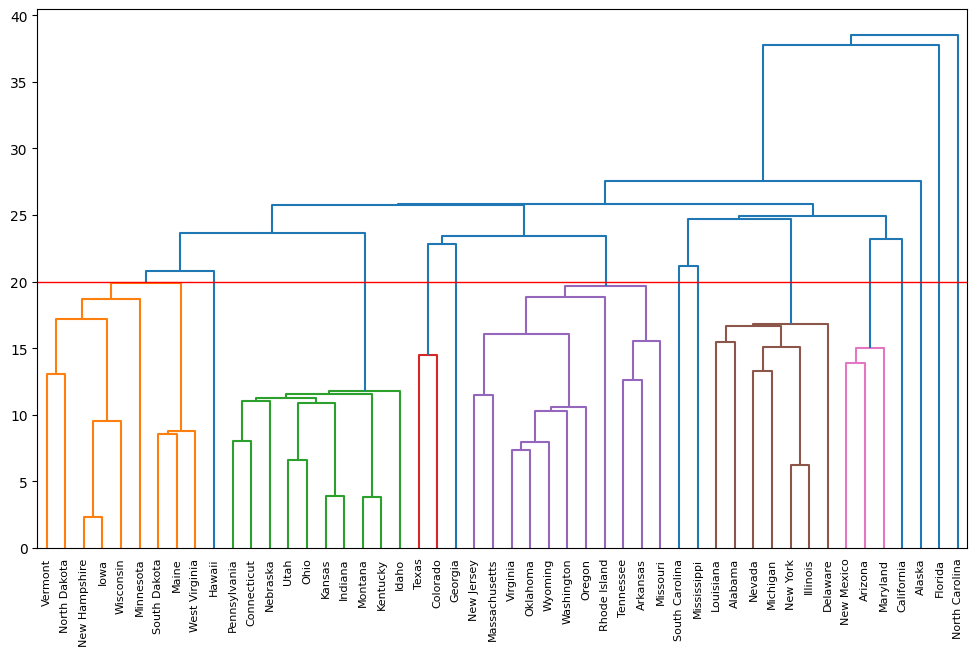

In [16]:
# 최단 연결법
single = linkage(df.drop(columns=['State']), metric='euclidean', method='single')

plt.figure(figsize=(12, 7))
dendrogram(
    single,
    orientation='top',
    labels=df['State'].to_list(),
    distance_sort='descending',
    color_threshold=20,
    show_leaf_counts=True
)
plt.axhline(20, color='r', linewidth=1)
plt.show()

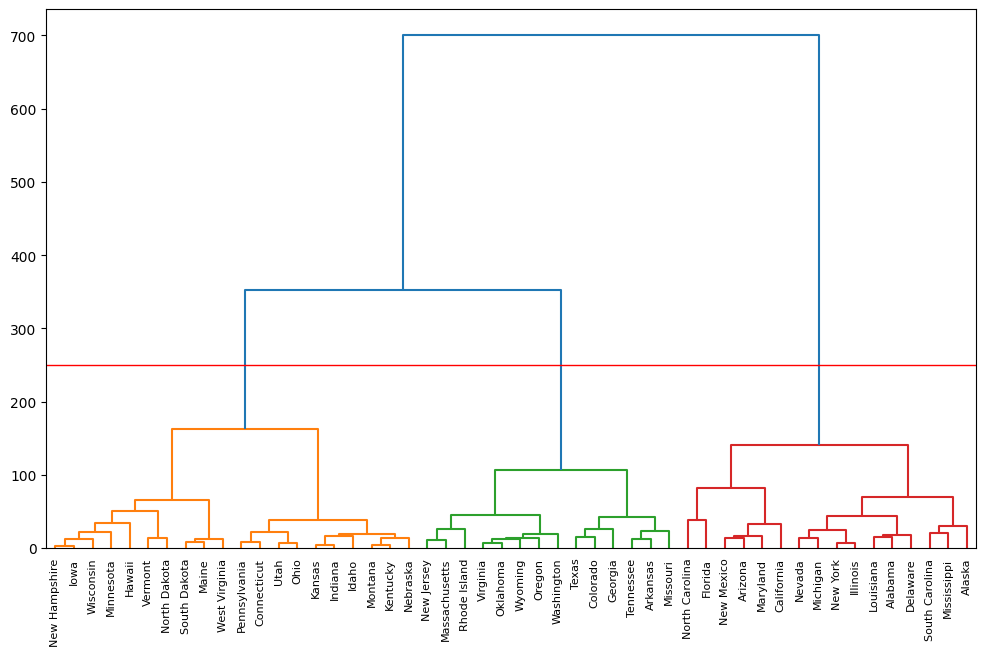

In [18]:
# 와드연결법
ward = linkage(df.drop(columns=['State']), metric='euclidean', method='ward')

plt.figure(figsize=(12, 7))
dendrogram(
    ward,
    orientation='top',
    labels=df['State'].to_list(),
    distance_sort='descending',
    color_threshold=250,
    show_leaf_counts=True
)
plt.axhline(250, color='r', linewidth=1)
plt.show()

In [ ]:
# state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [21]:
df['cluster'] = assignments
df.drop(columns=['State']).groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


In [22]:
df = pd.read_csv('./../ADP_모의고사/data/iris.csv')
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# 군집화 평가 지표
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    kmeans.fit(df.drop(columns=['target']))
    labels = kmeans.labels_
    score = calinski_harabasz_score(df.drop(columns=['target']), labels)
    print(f'cluster: {n_cluster}, calinski_harabasz_score: {score:.2f}')

cluster: 2, calinski_harabasz_score: 513.30
cluster: 3, calinski_harabasz_score: 560.37
cluster: 4, calinski_harabasz_score: 529.40
cluster: 5, calinski_harabasz_score: 458.17
cluster: 6, calinski_harabasz_score: 434.60
cluster: 7, calinski_harabasz_score: 449.08
cluster: 8, calinski_harabasz_score: 435.90
cluster: 9, calinski_harabasz_score: 408.63
cluster: 10, calinski_harabasz_score: 379.93


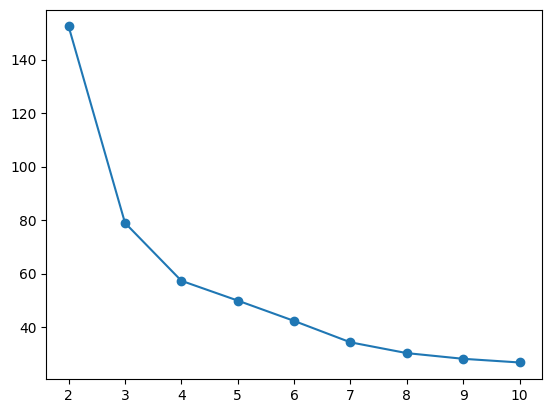

In [ ]:

sse = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df.drop(columns=['target']))
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse, marker='o')

In [30]:
km = KMeans(n_clusters=3, random_state=0)
km.fit(df.drop(columns=['target']))

df['cluster'] = km.labels_
df.drop(columns=['target']).groupby('cluster').mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.883607,2.740984,4.388525,1.434426
1,5.006000,3.418000,1.464000,0.244000
2,6.853846,3.076923,5.715385,2.053846


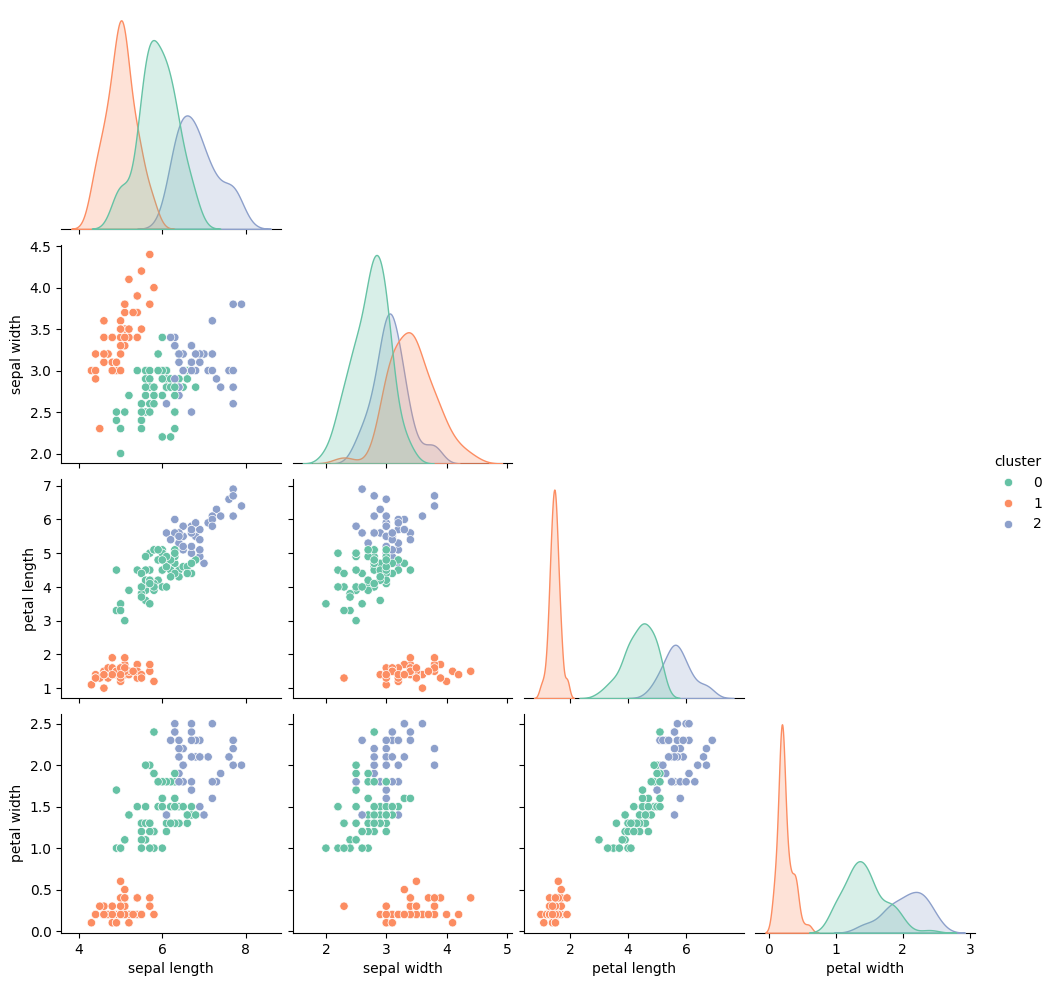

In [32]:
sns.pairplot(
    df,
    hue='cluster',
    diag_kind='kde',
    corner=True,
    palette='Set2',
    )

In [33]:
df

,sepal length,sepal width,petal length,petal width,target,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [37]:
df = pd.read_csv('./../ADP_모의고사/data/iris.csv')
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

df = df.drop(columns=['target'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# GMM

gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(df_scaled)
df['cluster'] = gmm.predict(df_scaled)

df.groupby('cluster').mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.904444,2.775556,4.193333,1.293333
1,5.006000,3.418000,1.464000,0.244000
2,6.554545,2.950909,5.489091,1.989091
